# üì° Data Loader - Exemplos Pr√°ticos

## üöÄ Importa√ß√µes e Setup Inicial

In [1]:
import loczcit_iqr as lz
from datetime import datetime
import xarray as xr
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from pathlib import Path

# Configurar logging para ver mais detalhes
import logging
logging.basicConfig(level=logging.INFO)

‚úÖ 18 fontes da biblioteca loczcit_iqr registradas com sucesso.
üé® Estilo tipogr√°fico profissional loczcit_iqr aplicado.
üåä LOCZCIT-IQR v0.0.1 carregada!
   üìñ Use lz.quick_start_guide() para come√ßar
   üîß Use lz.check_modules() para verificar m√≥dulos


In [2]:
lz.check_modules()

üåä LOCZCIT-IQR - Status dos M√≥dulos

üì¶ CORE:
   ‚úÖ data_loader
   ‚úÖ processor
   ‚úÖ iqr_detector
   ‚úÖ spline_interpolator
   ‚úÖ climatologia
   ‚úÖ Status core: Completo

üì¶ PLOTTING:
   ‚úÖ visualizer
   ‚úÖ style
   ‚úÖ Status plotting: Completo

üì¶ UTILS:
   ‚úÖ pentadas
   ‚úÖ validators
   ‚úÖ Status utils: Completo

üí° RECOMENDA√á√ïES:
   üéâ Todos os m√≥dulos est√£o funcionando perfeitamente!

üìö Para come√ßar, use: lz.quick_start_guide()


{'core': {'data_loader': True,
  'processor': True,
  'iqr_detector': True,
  'spline_interpolator': True,
  'climatologia': True,
  'all_available': True},
 'plotting': {'visualizer': True, 'style': True, 'all_available': True},
 'utils': {'pentadas': True, 'validators': True, 'all_available': True}}

## üåü Exemplo 1: Verifica√ß√£o de Conectividade e Status do Servidor

In [3]:
# Criar inst√¢ncia do loader
loader = lz.NOAADataLoader(cache_dir='./data_cache')

# üåê VERIFICAR CONECTIVIDADE PRIMEIRO
print("üîç Verificando conectividade com servidor NOAA...")
conectividade = loader._check_connectivity()
print(f"   Status: {'‚úÖ Conectado' if conectividade else '‚ùå Sem conex√£o'}")

# üìä STATUS COMPLETO DO SERVIDOR
print("\nüìä Status detalhado do servidor:")
status = loader.get_server_status()
print(f"   üåê URL: {status['server_url']}")
print(f"   üîó Conectividade: {'‚úÖ' if status['connectivity'] else '‚ùå'}")
print(f"   ‚è±Ô∏è Tempo de resposta: {status['response_time_ms']} ms")
print(f"   üìÅ Arquivos dispon√≠veis: {status['available_files']}")

if 'available_years' in status:
    print(f"   üìÖ Anos dispon√≠veis: {status['available_years']}")

üîç Verificando conectividade com servidor NOAA...
   Status: ‚úÖ Conectado

üìä Status detalhado do servidor:
   üåê URL: https://www.ncei.noaa.gov/data/outgoing-longwave-radiation-daily/access
   üîó Conectividade: ‚úÖ
   ‚è±Ô∏è Tempo de resposta: 774 ms
   üìÅ Arquivos dispon√≠veis: 47
   üìÖ Anos dispon√≠veis: [1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024, 2025]


In [ ]:
# Baixar dados de um ano espec√≠fico em loop
anos = [ano for ano in range(1979, 2025 + 1)]

for ano in anos:
    print(f"\nüì• Baixando dados para o ano {ano}...")
    try:
        loader.download_year_data(year=ano, show_progress=True)
        print(f"   ‚úÖ Dados do ano {ano} baixados com sucesso!")
    except Exception as e:
        print(f"   ‚ùå Erro ao baixar dados do ano {ano}: {e}")

## üì• Exemplo 2: üìä ESTIMAR TAMANHO ANTES DO DOWNLOAD

In [5]:
# üìä ESTIMAR TAMANHO ANTES DO DOWNLOAD
ano = '2025'
print(f"üìä Estimando tamanho do download para {ano}...")
estimate = loader.estimate_download_size(f'{ano}-01-01', f'{ano}-12-31')
print(f"   üìè Per√≠odo: {estimate['period_days']} dias")
print(f"   üíæ Tamanho estimado: {estimate['estimated_size_mb']} MB")
print(f"   ‚è∞ Tempo estimado: {estimate['estimated_download_time_readable']}")

üìä Estimando tamanho do download para 2025...
   üìè Per√≠odo: 365 dias
   üíæ Tamanho estimado: 182.5 MB
   ‚è∞ Tempo estimado: 3 minutos


## üåç Exemplo 3: Carregamento B√°sico com Valida√ß√µes

In [6]:
# üì° CARREGAMENTO B√ÅSICO COM TODAS AS OP√á√ïES
print("üì° Carregando dados com configura√ß√µes completas...")

try:
    data_completa = loader.load_data(
        start_date=f'{ano}-01-01',
        end_date=f'{ano}-12-31',
        study_area=None,                # Se None, ir√° ser usada a √°rea padr√£o utilizado no TCC
        quality_control=True,           # Aplicar controle de qualidade
        remove_leap_days=True           # Remover dias bissextos
    )
    
    print(f"‚úÖ Dados carregados: {data_completa.dims}")
    
    # Verificar atributos adicionados
    print("\nüìù Metadados adicionados:")
    for key, value in data_completa.attrs.items():
        if key.startswith('loczcit') or key in ['source', 'leap_days_removed']:
            print(f"   {key}: {value}")
    
    # Verificar qualidade dos dados
    if 'qc_flag' in data_completa.data_vars:
        print("\nüîç Controle de qualidade aplicado:")
        qc_unique = np.unique(data_completa.qc_flag.values[~np.isnan(data_completa.qc_flag.values)])
        for flag in qc_unique:
            count = (data_completa.qc_flag == flag).sum().item()
            meaning = {0: 'Bom', 1: 'Fora do intervalo', 2: 'Faltante'}
            print(f"   Flag {int(flag)} ({meaning.get(int(flag), 'Desconhecido')}): {count:,} pontos")

except Exception as e:
    print(f"‚ùå Erro no carregamento: {e}")

üì° Carregando dados com configura√ß√µes completas...


2025-09-28 17:33:59,077 - loczcit_iqr.core.data_loader - INFO - Buscando arquivo para o ano corrente (2025)...
INFO:loczcit_iqr.core.data_loader:Buscando arquivo para o ano corrente (2025)...
2025-09-28 17:33:59,079 - loczcit_iqr.core.data_loader - INFO - Arquivo do ano corrente encontrado: olr-daily_v01r02-preliminary_20250101_20250907.nc
INFO:loczcit_iqr.core.data_loader:Arquivo do ano corrente encontrado: olr-daily_v01r02-preliminary_20250101_20250907.nc
2025-09-28 17:33:59,080 - loczcit_iqr.core.data_loader - INFO - Carregando dados de: data_cache\olr-daily_v01r02-preliminary_20250101_20250907.nc
INFO:loczcit_iqr.core.data_loader:Carregando dados de: data_cache\olr-daily_v01r02-preliminary_20250101_20250907.nc
2025-09-28 17:33:59,368 - loczcit_iqr.core.data_loader - INFO - Dados carregados com sucesso: FrozenMappingWarningOnValuesAccess({'time': 250, 'lat': 180, 'lon': 360, 'bnds': 2})
INFO:loczcit_iqr.core.data_loader:Dados carregados com sucesso: FrozenMappingWarningOnValuesAcces

‚úÖ Dados carregados: FrozenMappingWarningOnValuesAccess({'time': 250, 'lat': 180, 'lon': 360, 'bnds': 2})

üìù Metadados adicionados:
   source: NOAA OLR Daily CDR
   loczcit_version: 1.0.0
   leap_days_removed: True

üîç Controle de qualidade aplicado:
   Flag 0 (Bom): 16,200,000 pontos


<xarray.Dataset> Size: 194MB
Dimensions:      (time: 250, lat: 180, lon: 360, bnds: 2)
Coordinates:
  * lat          (lat) float32 720B -89.5 -88.5 -87.5 -86.5 ... 87.5 88.5 89.5
  * time         (time) object 2kB 2025-01-01 12:00:00 ... 2025-09-07 12:00:00
  * lon          (lon) float32 1kB -179.5 -178.5 -177.5 ... 177.5 178.5 179.5
Dimensions without coordinates: bnds
Data variables:
    olr          (time, lat, lon) float32 65MB 188.2 188.2 188.2 ... 197.1 197.1
    lon_bounds   (lon, bnds) float32 3kB ...
    lat_bounds   (lat, bnds) float32 1kB ...
    time_bounds  (time, bnds) object 4kB ...
    qc_flag      (time, lat, lon) int64 130MB 0 0 0 0 0 0 0 0 ... 0 0 0 0 0 0 0
Attributes: (12/50)
    conventions:                CF-1.6, ACDD-1.3
    title:                      OLR-Daily CDR Product Ver01Rev02
    source:                     NOAA OLR Daily CDR
    reference:                  doi:10.1175/2007JTECHA989.1  doi:10.1175/1520...
    history:                    2025-09-09T16:01:

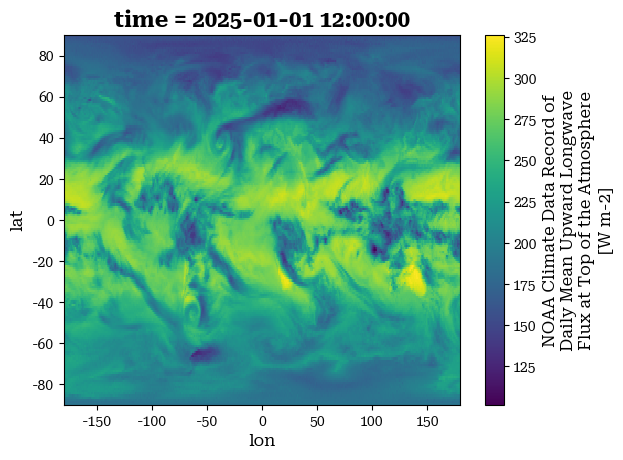

In [6]:
print(data_completa)
data_completa['olr'].sel(time=f'{ano}-01-01').plot()

## üåä Exemplo 4: 

### Estrat√©gia Dupla Escala Completa

Carrega dados com estrat√©gia dupla escala: globais + √°rea de estudo.

ANALOGIA DO FOT√ìGRAFO PROFISSIONAL üì∏ 

√â como tirar duas fotos do mesmo evento:

Foto panor√¢mica (dados globais) - para contexto completo

Foto focada (study area) - para an√°lise detalhada

2025-09-28 10:52:18,401 - loczcit_iqr.core.data_loader - INFO - üåç Carregando dados com estrat√©gia dupla escala...
INFO:loczcit_iqr.core.data_loader:üåç Carregando dados com estrat√©gia dupla escala...
2025-09-28 10:52:18,402 - loczcit_iqr.core.data_loader - INFO - üè™ ETAPA 0: Verificando cache local primeiro...
INFO:loczcit_iqr.core.data_loader:üè™ ETAPA 0: Verificando cache local primeiro...
2025-09-28 10:52:18,403 - loczcit_iqr.core.data_loader - INFO - üìã Encontrados 2 arquivos em cache
INFO:loczcit_iqr.core.data_loader:üìã Encontrados 2 arquivos em cache
2025-09-28 10:52:18,404 - loczcit_iqr.core.data_loader - INFO - üîç Procurando arquivos do ano no cache...
INFO:loczcit_iqr.core.data_loader:üîç Procurando arquivos do ano no cache...


üåä Carregando com estrat√©gia dupla escala completa...

üìç Op√ß√£o 1: Geometria padr√£o


2025-09-28 10:52:18,731 - loczcit_iqr.core.data_loader - INFO - ‚úÖ Arquivo do ano encontrado no cache: olr-daily_v01r02-preliminary_20240101_20241231.nc
INFO:loczcit_iqr.core.data_loader:‚úÖ Arquivo do ano encontrado no cache: olr-daily_v01r02-preliminary_20240101_20241231.nc
2025-09-28 10:52:18,732 - loczcit_iqr.core.data_loader - INFO - üì° Carregando dados globais (contexto completo)...
INFO:loczcit_iqr.core.data_loader:üì° Carregando dados globais (contexto completo)...
2025-09-28 10:52:18,872 - loczcit_iqr.core.data_loader - INFO - Removendo 1 dias 29/02
INFO:loczcit_iqr.core.data_loader:Removendo 1 dias 29/02
2025-09-28 10:52:18,958 - loczcit_iqr.core.data_loader - WARNING - Dados faltantes: 64800 (0.3%)
2025-09-28 10:52:19,077 - loczcit_iqr.core.data_loader - INFO - ‚úÖ Dados globais carregados: Frozen({'time': 365, 'lat': 180, 'lon': 360, 'bnds': 2})
INFO:loczcit_iqr.core.data_loader:‚úÖ Dados globais carregados: Frozen({'time': 365, 'lat': 180, 'lon': 360, 'bnds': 2})
2025-

‚úÖ Dados globais: Frozen({'time': 365, 'lat': 180, 'lon': 360, 'bnds': 2})
‚úÖ Study area: Frozen({'time': 365, 'lat': 25, 'lon': 38, 'bnds': 2})
   üåê Dados globais: FrozenMappingWarningOnValuesAccess({'time': 365, 'lat': 180, 'lon': 360, 'bnds': 2})
   üé≠ Dados da √°rea de estudo ‚úÇÔ∏è: FrozenMappingWarningOnValuesAccess({'time': 365, 'lat': 25, 'lon': 38, 'bnds': 2})
<xarray.Dataset> Size: 4MB
Dimensions:      (time: 365, lat: 25, lon: 38, bnds: 2)
Coordinates:
  * lat          (lat) float32 100B -9.5 -8.5 -7.5 -6.5 ... 11.5 12.5 13.5 14.5
  * time         (time) object 3kB 2024-01-01 12:00:00 ... 2024-12-31 12:00:00
  * lon          (lon) float32 152B -47.5 -46.5 -45.5 ... -12.5 -11.5 -10.5
Dimensions without coordinates: bnds
Data variables:
    olr          (time, lat, lon) float32 1MB 214.2 209.6 203.3 ... 306.4 304.7
    lon_bounds   (lon, bnds) float32 304B ...
    lat_bounds   (lat, bnds) float32 200B ...
    time_bounds  (time, bnds) object 6kB ...
    qc_flag      (ti

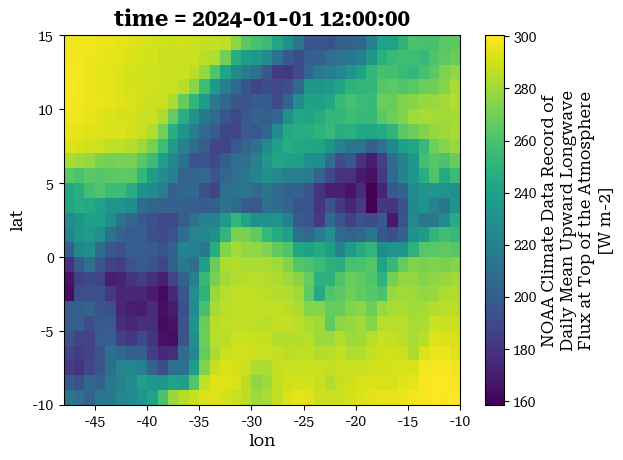

In [7]:
# üåä ESTRAT√âGIA DUPLA ESCALA COM TODAS AS OP√á√ïES
print("üåä Carregando com estrat√©gia dupla escala completa...")

ano = 2024

# Op√ß√£o 1: Com geometria padr√£o utilizada no trabalho de conclus√£o de curso (TCC)
print("\nüìç Op√ß√£o 1: Geometria padr√£o")
dados_globais_1, dados_area_1 = loader.load_data_dual_scale(
    start_date= f'{ano}-01-01',
    end_date= f'{ano}-12-31',
    study_area=None,  # Se None, utiliza geometria utilizada no TCC
    auto_download=True,
    quality_control=True,
    remove_leap_days=True,
    return_study_area_subset=True,
    mask_to_shape=False  # Usa BBOX padr√£o do TCC (sem mascaramento pela forma exata)
)

if dados_globais_1 is not None:
    print(f"   üåê Dados globais: {dados_globais_1.dims}")
if dados_area_1 is not None:
    print(f"   üé≠ Dados da √°rea de estudo ‚úÇÔ∏è: {dados_area_1.dims}")
    print(dados_area_1)
    dados_area_1['olr'].sel(time=f'{ano}-01-01').plot()

2025-09-28 10:52:53,764 - loczcit_iqr.core.data_loader - INFO - üåç Carregando dados com estrat√©gia dupla escala...
INFO:loczcit_iqr.core.data_loader:üåç Carregando dados com estrat√©gia dupla escala...
2025-09-28 10:52:53,765 - loczcit_iqr.core.data_loader - INFO - üè™ ETAPA 0: Verificando cache local primeiro...
INFO:loczcit_iqr.core.data_loader:üè™ ETAPA 0: Verificando cache local primeiro...
2025-09-28 10:52:53,766 - loczcit_iqr.core.data_loader - INFO - üìã Encontrados 2 arquivos em cache
INFO:loczcit_iqr.core.data_loader:üìã Encontrados 2 arquivos em cache
2025-09-28 10:52:53,767 - loczcit_iqr.core.data_loader - INFO - üîç Procurando arquivos do ano no cache...
INFO:loczcit_iqr.core.data_loader:üîç Procurando arquivos do ano no cache...
2025-09-28 10:52:53,903 - loczcit_iqr.core.data_loader - INFO - ‚úÖ Arquivo do ano encontrado no cache: olr-daily_v01r02-preliminary_20240101_20241231.nc
INFO:loczcit_iqr.core.data_loader:‚úÖ Arquivo do ano encontrado no cache: olr-daily_


üé≠ Op√ß√£o 2: Geometria padr√£o com mascaramento


2025-09-28 10:52:54,041 - loczcit_iqr.core.data_loader - INFO - Removendo 1 dias 29/02
INFO:loczcit_iqr.core.data_loader:Removendo 1 dias 29/02
2025-09-28 10:52:54,128 - loczcit_iqr.core.data_loader - WARNING - Dados faltantes: 64800 (0.3%)
2025-09-28 10:52:54,239 - loczcit_iqr.core.data_loader - INFO - ‚úÖ Dados globais carregados: Frozen({'time': 365, 'lat': 180, 'lon': 360, 'bnds': 2})
INFO:loczcit_iqr.core.data_loader:‚úÖ Dados globais carregados: Frozen({'time': 365, 'lat': 180, 'lon': 360, 'bnds': 2})
2025-09-28 10:52:54,240 - loczcit_iqr.core.data_loader - INFO - üéØ Processando subset da √°rea de estudo...
INFO:loczcit_iqr.core.data_loader:üéØ Processando subset da √°rea de estudo...
2025-09-28 10:52:54,242 - loczcit_iqr.core.data_loader - INFO - üìç Carregando geometria padr√£o de: E:\ambiente_python_2025-main\src\data\shapefiles\Area_LOCZCIT.parquet
INFO:loczcit_iqr.core.data_loader:üìç Carregando geometria padr√£o de: E:\ambiente_python_2025-main\src\data\shapefiles\Area

‚úÖ Dados globais: Frozen({'time': 365, 'lat': 180, 'lon': 360, 'bnds': 2})
‚úÖ Study area: Frozen({'time': 365, 'lat': 25, 'lon': 38, 'bnds': 2})
üé≠ Dados mascarados ‚úÇÔ∏è: FrozenMappingWarningOnValuesAccess({'time': 365, 'lat': 25, 'lon': 38, 'bnds': 2})
<xarray.Dataset> Size: 10MB
Dimensions:      (time: 365, lat: 25, lon: 38, bnds: 2)
Coordinates:
  * lat          (lat) float32 100B -9.5 -8.5 -7.5 -6.5 ... 11.5 12.5 13.5 14.5
  * time         (time) object 3kB 2024-01-01 12:00:00 ... 2024-12-31 12:00:00
  * lon          (lon) float32 152B -47.5 -46.5 -45.5 ... -12.5 -11.5 -10.5
Dimensions without coordinates: bnds
Data variables:
    olr          (time, lat, lon) float32 1MB nan nan nan nan ... nan nan nan
    lon_bounds   (lon, bnds, lat) float32 8kB nan nan nan nan ... nan nan nan
    lat_bounds   (lat, bnds, lon) float32 8kB nan nan nan nan ... nan nan nan
    time_bounds  (time, bnds, lat, lon) object 6MB nan nan nan ... nan nan nan
    qc_flag      (time, lat, lon) float64 

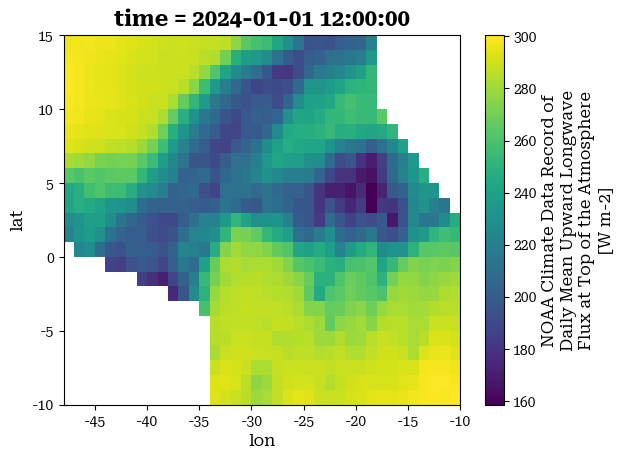

In [8]:
# Op√ß√£o 2: Com mascaramento pela forma exata
print("\nüé≠ Op√ß√£o 2: Geometria padr√£o com mascaramento")
dados_globais_2, dados_area_2 = loader.load_data_dual_scale(
    start_date=f'{ano}-01-01',
    end_date=f'{ano}-12-31',
    study_area=None,  # Geometria padr√£o
    auto_download=True,
    quality_control=True,
    remove_leap_days=True,
    return_study_area_subset=True,
    mask_to_shape=True  # Mascaramento pela forma exata
)

if dados_area_2 is not None:
    print(f"üé≠ Dados mascarados ‚úÇÔ∏è: {dados_area_2.dims}")
    print(dados_area_2)
    dados_area_2['olr'].sel(time=f'{ano}-01-01').plot()

2025-09-28 10:53:21,598 - loczcit_iqr.core.data_loader - INFO - üåç Carregando dados com estrat√©gia dupla escala...
INFO:loczcit_iqr.core.data_loader:üåç Carregando dados com estrat√©gia dupla escala...
2025-09-28 10:53:21,599 - loczcit_iqr.core.data_loader - INFO - üè™ ETAPA 0: Verificando cache local primeiro...
INFO:loczcit_iqr.core.data_loader:üè™ ETAPA 0: Verificando cache local primeiro...
2025-09-28 10:53:21,600 - loczcit_iqr.core.data_loader - INFO - üìã Encontrados 2 arquivos em cache
INFO:loczcit_iqr.core.data_loader:üìã Encontrados 2 arquivos em cache
2025-09-28 10:53:21,601 - loczcit_iqr.core.data_loader - INFO - üîç Procurando arquivos do ano no cache...
INFO:loczcit_iqr.core.data_loader:üîç Procurando arquivos do ano no cache...
2025-09-28 10:53:21,738 - loczcit_iqr.core.data_loader - INFO - ‚úÖ Arquivo do ano encontrado no cache: olr-daily_v01r02-preliminary_20240101_20241231.nc
INFO:loczcit_iqr.core.data_loader:‚úÖ Arquivo do ano encontrado no cache: olr-daily_


‚úÇÔ∏è Op√ß√£o 3: √°rea de estudo customizada pelo usu√°rio


2025-09-28 10:53:21,884 - loczcit_iqr.core.data_loader - INFO - Removendo 1 dias 29/02
INFO:loczcit_iqr.core.data_loader:Removendo 1 dias 29/02
2025-09-28 10:53:21,970 - loczcit_iqr.core.data_loader - WARNING - Dados faltantes: 64800 (0.3%)
2025-09-28 10:53:22,078 - loczcit_iqr.core.data_loader - INFO - ‚úÖ Dados globais carregados: Frozen({'time': 365, 'lat': 180, 'lon': 360, 'bnds': 2})
INFO:loczcit_iqr.core.data_loader:‚úÖ Dados globais carregados: Frozen({'time': 365, 'lat': 180, 'lon': 360, 'bnds': 2})
2025-09-28 10:53:22,080 - loczcit_iqr.core.data_loader - INFO - üéØ Processando subset da √°rea de estudo...
INFO:loczcit_iqr.core.data_loader:üéØ Processando subset da √°rea de estudo...
2025-09-28 10:53:22,080 - loczcit_iqr.core.data_loader - INFO - ‚úÇÔ∏è Recortando dados pelo BBOX fornecido: LAT(-10.00:10.00), LON(-34.00:-15.00)
INFO:loczcit_iqr.core.data_loader:‚úÇÔ∏è Recortando dados pelo BBOX fornecido: LAT(-10.00:10.00), LON(-34.00:-15.00)
2025-09-28 10:53:22,082 - loczcit

‚úÖ Dados globais: Frozen({'time': 365, 'lat': 180, 'lon': 360, 'bnds': 2})
‚úÖ Study area: Frozen({'time': 365, 'lat': 20, 'lon': 19, 'bnds': 2})
üé≠ Dados da √°rea de estudo ‚úÇÔ∏è: FrozenMappingWarningOnValuesAccess({'time': 365, 'lat': 20, 'lon': 19, 'bnds': 2})
<xarray.Dataset> Size: 2MB
Dimensions:      (time: 365, lat: 20, lon: 19, bnds: 2)
Coordinates:
  * lat          (lat) float32 80B -9.5 -8.5 -7.5 -6.5 -5.5 ... 6.5 7.5 8.5 9.5
  * time         (time) object 3kB 2024-01-01 12:00:00 ... 2024-12-31 12:00:00
  * lon          (lon) float32 76B -33.5 -32.5 -31.5 -30.5 ... -17.5 -16.5 -15.5
Dimensions without coordinates: bnds
Data variables:
    olr          (time, lat, lon) float32 555kB 293.1 290.8 ... 295.4 295.6
    lon_bounds   (lon, bnds) float32 152B ...
    lat_bounds   (lat, bnds) float32 160B ...
    time_bounds  (time, bnds) object 6kB ...
    qc_flag      (time, lat, lon) int64 1MB 0 0 0 0 0 0 0 0 ... 0 0 0 0 0 0 0 0
Attributes: (12/46)
    conventions:              

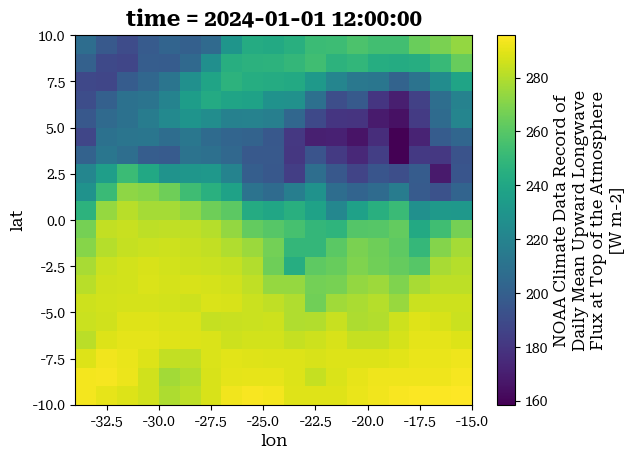

In [9]:
# Op√ß√£o 3: Com BBOX customizado
print("\n‚úÇÔ∏è Op√ß√£o 3: √°rea de estudo customizada pelo usu√°rio")
# Exemplo de BBOX (min_lat, max_lat, min_lon, max_lon)
bbox_custom = (-10, 10, -34, -15)  # √Årea sobre o oceano Atl√¢ntico equatorial
dados_globais_3, dados_area_3 = loader.load_data_dual_scale(
    start_date=f'{ano}-01-01',
    end_date=f'{ano}-12-31',
    study_area=bbox_custom,
    return_study_area_subset=True
)

if dados_area_3 is not None:
    print(f"üé≠ Dados da √°rea de estudo ‚úÇÔ∏è: {dados_area_3.dims}")
    print(dados_area_3)
    dados_area_3['olr'].sel(time=f'{ano}-01-01').plot()

## üíæ Exemplo 5: Gerenciamento de Cache Avan√ßado

In [10]:
# üìÅ EXPLORAR CACHE LOCAL
print("üìÅ Explorando cache local...")
cached_files = loader.list_cached_files()
print(f"Arquivos em cache: {len(cached_files)}")

# Mostrar detalhes dos arquivos em cache
for file_info in cached_files:
    print(f"\nüìÑ {file_info['filename']}")
    print(f"   üìè Tamanho: {file_info['size_mb']:.1f} MB")
    print(f"   üìÖ Modificado: {file_info['modified']}")
    print(f"   ‚úÖ V√°lido: {file_info['valid']}")
    
    # Mostrar metadados se dispon√≠veis
    if 'checksum' in file_info:
        print(f"   üîê Checksum: {file_info['checksum'][:8]}...")
    if 'download_date' in file_info:
        print(f"   ‚¨áÔ∏è Download: {file_info['download_date'][:19]}")

üìÅ Explorando cache local...
Arquivos em cache: 2

üìÑ olr-daily_v01r02-preliminary_20250101_20250907.nc
   üìè Tamanho: 61.8 MB
   üìÖ Modificado: 2025-09-28 10:50:29.457707
   ‚úÖ V√°lido: True
   üîê Checksum: 2e4b5312...
   ‚¨áÔ∏è Download: 2025-09-28T10:50:31

üìÑ olr-daily_v01r02-preliminary_20240101_20241231.nc
   üìè Tamanho: 90.5 MB
   üìÖ Modificado: 2025-09-24 23:11:42.873555
   ‚úÖ V√°lido: True
   üîê Checksum: 361ff6e2...
   ‚¨áÔ∏è Download: 2025-09-24T23:11:43
